<a href="https://colab.research.google.com/github/Rampy1799/Machine_Learning/blob/main/Interpretability_of_Secondhand_Car%20prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/cardekho_data.csv')

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(df)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Percentage of Missing Data:
 Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64


In [ ]:
df.duplicated().sum()

2

In [ ]:
df = df.drop_duplicates()

In [ ]:
clean_df = df.dropna()

In [ ]:
clean_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
# Removing Owner and car_namecolumn as it doesn't provide much value to us

clean_df = clean_df.drop(columns = ['Owner' , 'Car_Name'])

clean_df

KeyError: "['Owner', 'Car_Name'] not found in axis"

<ipython-input-13-9554a6a8ecd5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_df.corr(), annot=True, cmap='Greens')


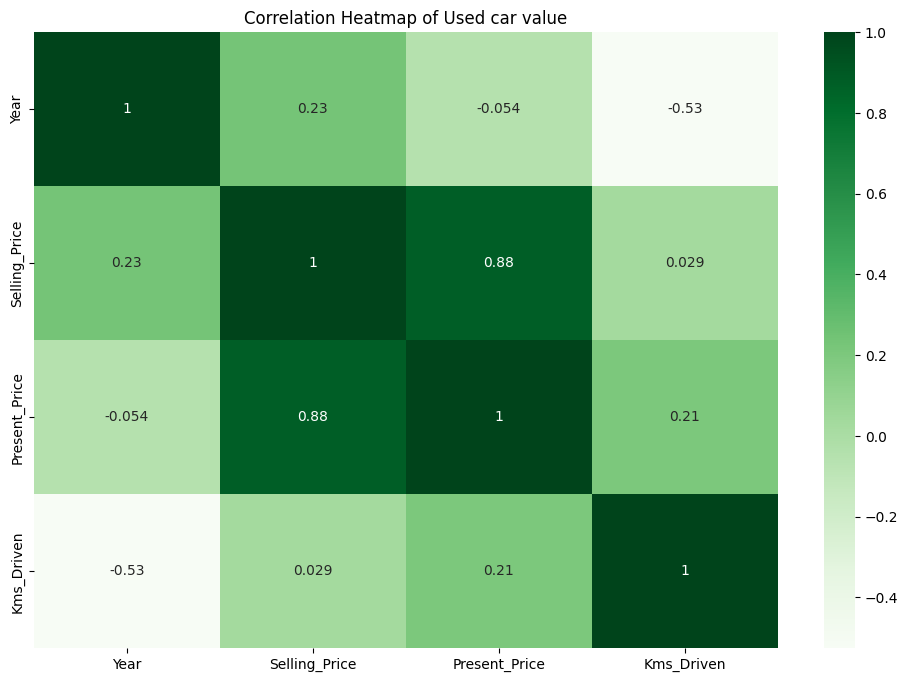

In [ ]:
# Finding out the relations between the predictor variables and target variables using heatmap


plt.figure(figsize=(12, 8))
sns.heatmap(clean_df.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Used car value')
plt.show()

As per the heatmap, the present_price is having a correlation for our target variable "Selling Price". However, we need to encode our categorical variables to get a clear picture!

In [ ]:
clean_df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [ ]:
clean_df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [ ]:
# Seeing the categorical values and numerical values in our dataset

categorical = []
for col in clean_df.columns:
  if (clean_df[col].dtype == 'O'):
    categorical.append(col)
categorical

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [ ]:
numerical = []
for col in clean_df.columns:
  if(clean_df[col].dtype != 'O'):
    numerical.append(col)
numerical

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']

In [ ]:
clean_df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
clean_df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [ ]:
final_df = clean_df.copy()



In [ ]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual


In [ ]:
# Encoding categorical variables

import pandas as pd

# Sample data
data = {
    "Seller_Type": ["Dealer", "Individual"],
    "Transmission": ["Manual", "Automatic"],
    "Fuel_Type": ["Petrol", "Diesel"]
}

# Create a DataFrame from the data
car_df = clean_df.copy()

# Define encoding functions (same as before)
def binary_encode(category):
  if category == "Dealer" or category == "Manual":
    return 0
  else:
    return 1

fuel_type_mapping = {"Petrol": 1, "Diesel": 2, "CNG": 3}

# Encode Seller_Type and Transmission (using apply)
car_df["Seller_Type_Encoded"] = car_df["Seller_Type"].apply(binary_encode)
car_df["Transmission_Encoded"] = car_df["Transmission"].apply(binary_encode)

# Encode Fuel_Type (using lookup)
car_df["Fuel_Type_Encoded"] = car_df["Fuel_Type"].replace(fuel_type_mapping)

# Remove original categorical columns
car_df.drop(columns=["Seller_Type", "Transmission", "Fuel_Type"], inplace=True)

# Print results (shows the encoded DataFrame)
print(car_df)



     Year  Selling_Price  Present_Price  Kms_Driven  Seller_Type_Encoded  \
0    2014           3.35           5.59       27000                    0   
1    2013           4.75           9.54       43000                    0   
2    2017           7.25           9.85        6900                    0   
3    2011           2.85           4.15        5200                    0   
4    2014           4.60           6.87       42450                    0   
..    ...            ...            ...         ...                  ...   
296  2016           9.50          11.60       33988                    0   
297  2015           4.00           5.90       60000                    0   
298  2009           3.35          11.00       87934                    0   
299  2017          11.50          12.50        9000                    0   
300  2016           5.30           5.90        5464                    0   

     Transmission_Encoded  Fuel_Type_Encoded  
0                       0               

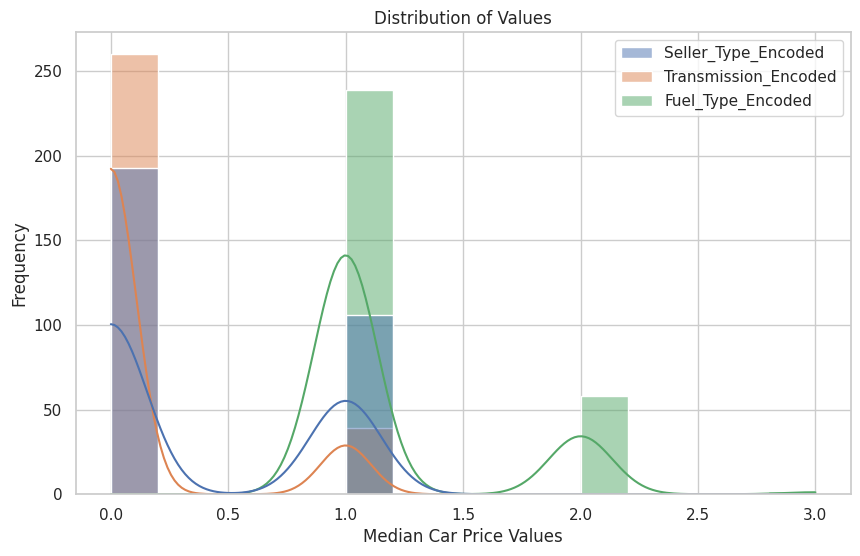

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(car_df[['Seller_Type_Encoded', 'Transmission_Encoded', 'Fuel_Type_Encoded']], color='forestgreen', kde=True)
plt.title('Distribution of Values')
plt.xlabel('Median Car Price Values')
plt.ylabel('Frequency')
plt.show()

 Corelation of values: 
                           Year  Selling_Price  Present_Price  Kms_Driven  \
Year                  1.000000       0.234369      -0.053563   -0.525714   
Selling_Price         0.234369       1.000000       0.876378    0.028566   
Present_Price        -0.053563       0.876378       1.000000    0.205253   
Kms_Driven           -0.525714       0.028566       0.205253    1.000000   
Seller_Type_Encoded  -0.036820      -0.553851      -0.511686   -0.101030   
Transmission_Encoded -0.003434       0.348869       0.334265    0.163881   
Fuel_Type_Encoded     0.046210       0.500292       0.431809    0.167287   

                      Seller_Type_Encoded  Transmission_Encoded  \
Year                            -0.036820             -0.003434   
Selling_Price                   -0.553851              0.348869   
Present_Price                   -0.511686              0.334265   
Kms_Driven                      -0.101030              0.163881   
Seller_Type_Encoded            

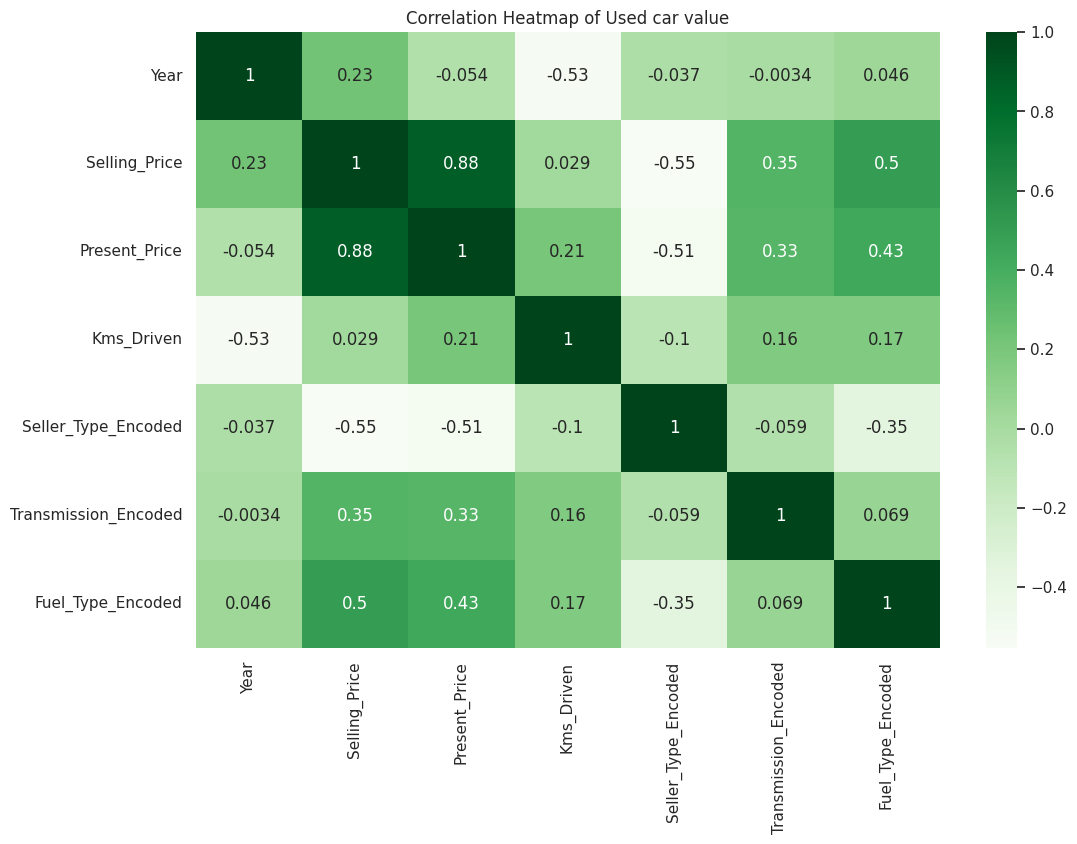

In [ ]:
# Now checking the co-relation matrix
print(f" Corelation of values: \n {car_df.corr()}")

plt.figure(figsize=(12, 8))
sns.heatmap(car_df.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Used car value')
plt.show()

After encoding the categorical values and looking at the heatmap, Present_Price still remains the top independent variable or predictor variable. Followed by, Fuel_Type encoded and Transmission encoded.

In [ ]:
# Defining the features

features = ['Present_Price' , 'Fuel_Type_Encoded', 'Transmission_Encoded']

target = ['Selling_Price']

X = car_df[features]

y = car_df[target]

# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)


# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 239 samples
Test set size: 60 samples


# Training the model on linear model

In [ ]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const

,const,Present_Price,Fuel_Type_Encoded,Transmission_Encoded
57,1.0,18.54,1,0
281,1.0,7.60,1,0
10,1.0,3.60,1,0
35,1.0,7.74,3,0
147,1.0,0.84,1,0
...,...,...,...,...
278,1.0,8.40,1,0
154,1.0,0.88,1,0
182,1.0,0.58,1,0
164,1.0,0.54,1,0


In [ ]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     309.2
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           2.85e-81
Time:                        04:27:54   Log-Likelihood:                -522.96
No. Observations:                 239   AIC:                             1054.
Df Residuals:                     235   BIC:                             1068.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1178 

 **Prediction and Testing**

In [ ]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

28      2.511454
95      8.782083
186     1.848755
16      7.376885
282     8.749921
158     1.052870
287     4.834362
84      8.518943
38      2.430184
1       6.842213
141     1.164082
88      3.409702
99     11.508827
199     1.069979
219     4.842622
71      8.099761
60      8.782083
218     4.842622
184     1.142695
69      9.765878
4       5.700154
23      2.301863
91      9.643892
174     1.129863
34      6.209162
160     1.228242
142     1.181191
209     5.199702
117     1.634593
131     1.172636
47      2.597002
105     1.835629
80      9.130608
2       5.035104
52     12.022406
190     1.142695
248     2.789483
220     2.716768
87      6.699002
183     1.022928
284     3.345542
73      3.264272
40      4.992624
176     1.271016
259     3.816053
245     6.782330
133     1.228242
64     19.062961
152     1.245352
222     6.012403
163     1.228242
148     1.223965
146     1.158521
116     1.450666
226     3.259994
237     8.578826
128     1.194023
240     6.782330
97      8.7949

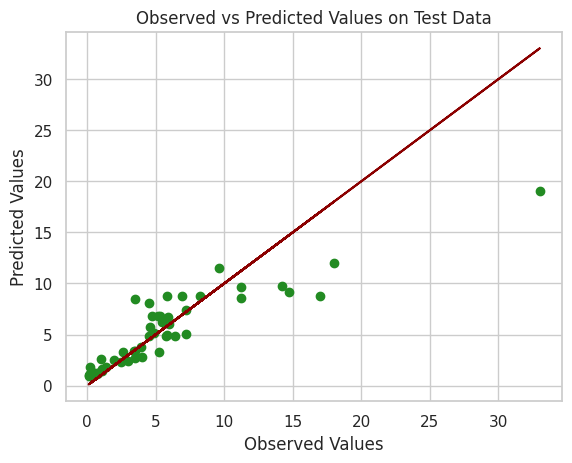

In [ ]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()

In [ ]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")

The mean of the residuals is 0.0


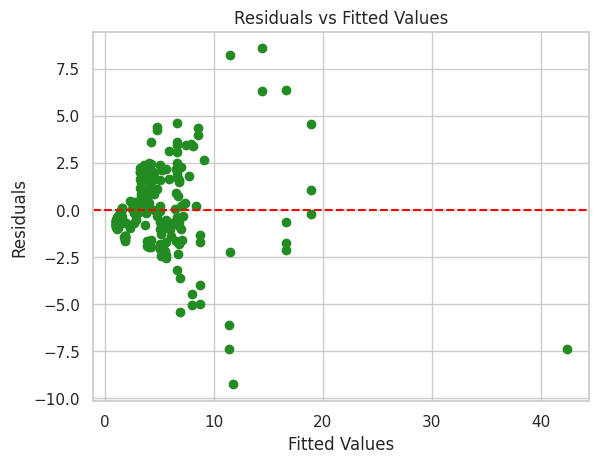

In [ ]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


In [ ]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and Present_Price: 0.0
Correlation between residuals and Fuel_Type_Encoded: 0.0
Correlation between residuals and Transmission_Encoded: 0.0


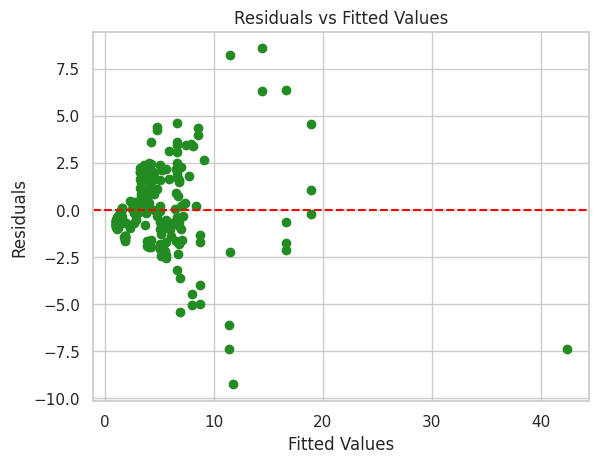

In [ ]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Train/Test and Evaluation

**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 2.754041806424869


In [ ]:
print(y_pred)
y_test

[[ 2.51145412]
 [ 8.78208269]
 [ 1.84875543]
 [ 7.37688464]
 [ 8.74992132]
 [ 1.05286998]
 [ 4.83436167]
 [ 8.51894319]
 [ 2.43018403]
 [ 6.84221304]
 [ 1.16408167]
 [ 3.40970241]
 [11.5088268 ]
 [ 1.06997947]
 [ 4.84262231]
 [ 8.09976065]
 [ 8.78208269]
 [ 4.84262231]
 [ 1.14269481]
 [ 9.76587845]
 [ 5.70015449]
 [ 2.30186285]
 [ 9.64389224]
 [ 1.12986269]
 [ 6.20916186]
 [ 1.22824227]
 [ 1.18119117]
 [ 5.19970187]
 [ 1.63459269]
 [ 1.17263642]
 [ 2.59700157]
 [ 1.83562921]
 [ 9.1306075 ]
 [ 5.03510409]
 [12.02240564]
 [ 1.14269481]
 [ 2.78948335]
 [ 2.71676801]
 [ 6.69900212]
 [ 1.02292837]
 [ 3.34554182]
 [ 3.26427174]
 [ 4.99262446]
 [ 1.271016  ]
 [ 3.81605283]
 [ 6.78232982]
 [ 1.22824227]
 [19.06296133]
 [ 1.24535176]
 [ 6.01240271]
 [ 1.22824227]
 [ 1.22396489]
 [ 1.15852109]
 [ 1.45066565]
 [ 3.25999436]
 [ 8.57882641]
 [ 1.19402328]
 [ 6.78232982]
 [ 8.79491481]
 [ 0.95876778]]


,Selling_Price
28,1.95
95,5.85
186,0.25
16,7.25
282,8.25
158,0.48
287,5.75
84,3.49
38,3.00
1,4.75


# Performing SHAP analysis

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.2 MB/s eta 0:00:00


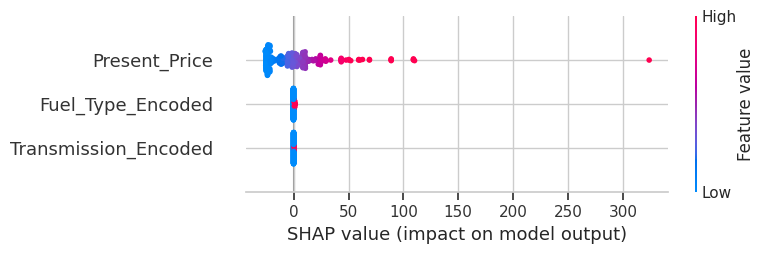

In [ ]:
import shap
import pandas as pd

explainer = shap.LinearExplainer(lr, X )
shap_values = explainer(X)
shap.summary_plot(shap_values, X)


# Fitting a Tree model


In [ ]:
car_df

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type_Encoded,Transmission_Encoded,Fuel_Type_Encoded
0,2014,3.35,5.59,27000,0,0,1
1,2013,4.75,9.54,43000,0,0,2
2,2017,7.25,9.85,6900,0,0,1
3,2011,2.85,4.15,5200,0,0,1
4,2014,4.60,6.87,42450,0,0,2
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,2
297,2015,4.00,5.90,60000,0,0,1
298,2009,3.35,11.00,87934,0,0,1
299,2017,11.50,12.50,9000,0,0,2


In [ ]:
tree_df = car_df.copy()
tree_df

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type_Encoded,Transmission_Encoded,Fuel_Type_Encoded
0,2014,3.35,5.59,27000,0,0,1
1,2013,4.75,9.54,43000,0,0,2
2,2017,7.25,9.85,6900,0,0,1
3,2011,2.85,4.15,5200,0,0,1
4,2014,4.60,6.87,42450,0,0,2
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,2
297,2015,4.00,5.90,60000,0,0,1
298,2009,3.35,11.00,87934,0,0,1
299,2017,11.50,12.50,9000,0,0,2


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Creating the decision tree regressor model
tree_regressor = DecisionTreeRegressor(random_state=1)


# Fitting the model with your predictor and target variables
tree_regressor.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [ ]:
print("Making predictions for the following 5 records:")
print(X.head())
print("The predictions are")
print(tree_regressor.predict(X.head()))

Making predictions for the following 5 records:
   Present_Price  Fuel_Type_Encoded  Transmission_Encoded
0           5.59                  1                     0
1           9.54                  2                     0
2           9.85                  1                     0
3           4.15                  1                     0
4           6.87                  2                     0
The predictions are
[3.35 4.75 7.25 1.95 4.6 ]


In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error

predicted_app_temp = tree_regressor.predict(X)
mean_absolute_error(y, predicted_app_temp)

0.3774663162924033

In [ ]:
# Training and testing split

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state = 0)
# Defining model
temp_model = DecisionTreeRegressor()
# Fit model
temp_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = temp_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

1.0284425925925926


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  1
Max leaf nodes: 50  		 Mean Absolute Error:  1
Max leaf nodes: 500  		 Mean Absolute Error:  1
Max leaf nodes: 5000  		 Mean Absolute Error:  1


**Fitting a Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
temp_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, temp_preds))

1.0931994939921192


<ipython-input-65-5b875369794c>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(train_X, train_y)


# SHAP Analysis on Tree Model


<ipython-input-66-3c181155598e>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


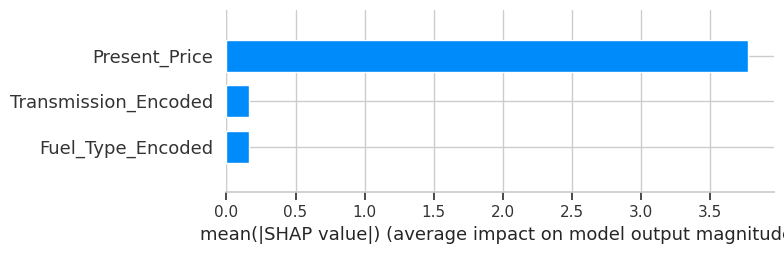

In [ ]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Calculate SHAP values for the test data
explainer = shap.TreeExplainer(rf_regressor)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


# Auto ML